# Estudiando la evolución del COVID-19 en Argentina

## 1. Instalamos dependencias

In [1]:
!pip install pandas matplotlib

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10,6)

In [3]:
print("Pandas version: {}".format(pd.__version__))
print("Matplotlib version: {}".format(matplotlib.__version__))

Pandas version: 1.0.5
Matplotlib version: 3.2.2


## 2. Un vistazo inicial
Los datos están en el dataframe `df`. Como vemos, están indexados por fecha. Gracias a la gente de [Sistemas Mapache](https://github.com/SistemasMapache/Covid19arData) por estos datos.
Parecen tener la ventaja además de contar con un feature que es el índice ordinal de día de la pandemia, de cuarentena.

In [4]:
url = 'https://docs.google.com/spreadsheets/d/16-bnsDdmmgtSxdWbVMboIHo5FRuz76DBxsz_BbsEVWA/export?format=csv&id=16-bnsDdmmgtSxdWbVMboIHo5FRuz76DBxsz_BbsEVWA&gid=0'
df = pd.read_csv(url)
print(df.head())

       fecha  dia_inicio  dia_cuarentena_dnu260 osm_admin_level_2  \
0  2/03/2020           1                    NaN         Argentina   
1  3/03/2020           2                    NaN         Argentina   
2  4/03/2020           3                    NaN         Argentina   
3  5/03/2020           4                    NaN         Argentina   
4  6/03/2020           5                    NaN         Argentina   

  osm_admin_level_4 osm_admin_level_8  tot_casosconf  nue_casosconf_diff  \
0              CABA               NaN              1                   1   
1     Indeterminado               NaN              1                   0   
2     Indeterminado               NaN              1                   0   
3      Buenos Aires               NaN              2                   1   
4     Indeterminado               NaN              2                   0   

   tot_fallecidos  nue_fallecidos_diff  tot_recuperados  tot_terapia  \
0               0                    0              NaN 

> ⚠️ **OJO**: Los datos no están agregados por fecha, hacia el final del dataset vemos muchas entradas para el mismo día.
Viendo con atención, parece que están agrupados por provincia/día

In [5]:
print(df.tail())

           fecha  dia_inicio  dia_cuarentena_dnu260 osm_admin_level_2  \
2412  26/07/2020         144                  128.0         Argentina   
2413  26/07/2020         144                  128.0         Argentina   
2414  26/07/2020         144                  128.0         Argentina   
2415  26/07/2020         144                  128.0         Argentina   
2416  26/07/2020         144                  128.0         Argentina   

        osm_admin_level_4 osm_admin_level_8  tot_casosconf  \
2412             Santa Fe               NaN         162511   
2413  Santiago del Estero               NaN         162512   
2414     Tierra del Fuego               NaN         162518   
2415              Tucumán               NaN         162526   
2416        Indeterminado               NaN         162526   

      nue_casosconf_diff  tot_fallecidos  nue_fallecidos_diff  \
2412                  41            2939                    0   
2413                   1            2939                  

**Empecemos ploteando la cantidad de casos y fallecidos por dia de la pandemia.**

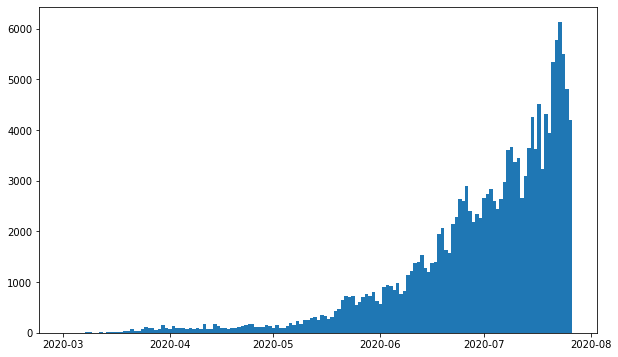

In [6]:
#print(df)
df.fecha = pd.to_datetime(df.fecha, format='%d/%m/%Y')
porDia = df.nue_casosconf_diff.groupby(df.fecha).sum()
porDia = df.resample('D', on='fecha').sum()
plt.bar(porDia.index, porDia.nue_casosconf_diff, width=1);

## Ploteamos el MA para las últimas dos y tres semanas

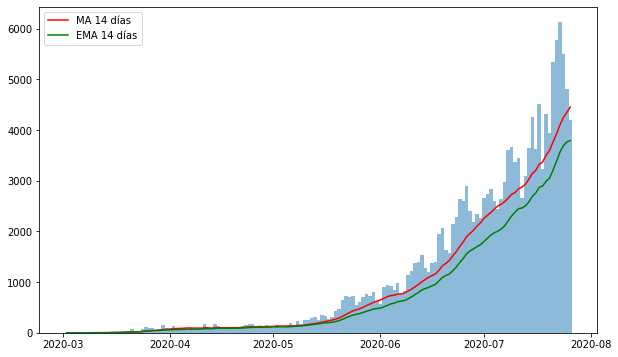

In [9]:
plt.bar(porDia.index, porDia.nue_casosconf_diff, width=1, alpha=.5);
# Calculamos el MA
ma14 = porDia.nue_casosconf_diff.rolling(14)
ema14 = porDia.nue_casosconf_diff.ewm(14)
plt.plot(porDia.index, ma14.mean(), color='r', label='MA 14 días');
plt.plot(porDia.index, ema14.mean(), color='g', label='EMA 14 días');
plt.legend();
